## 관심 도메인
* 국내 거주(체류) 외국인
* 해결 과제:
    - 국내 거주 외국인이 겪는 문제는 무엇인가?
    - 국내 거주 외국인의 긍정적/부정적 기능은 무엇인가?

## 데이터

* KOSIS(국가통계포털)_이민자체류실태및고용조사
    - 교육정도별 경제활동인구(이민자)

In [51]:
from google.colab import files
uploaded = files.upload()

Saving 교육정도별_경제활동인구_이민자__20250902095329.csv to 교육정도별_경제활동인구_이민자__20250902095329 (2).csv


In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
# read file
file_path = '교육정도별_경제활동인구_이민자__20250902095329.csv'
df = pd.read_csv(file_path, encoding='cp949', header=[0, 1])

In [54]:
df

대상별         교육정도별           2024                           \
      대상별         교육정도별 15세 이상 인구 (천명) - 경제활동인구 (천명) · 취업자 (천명)   
0     이민자             계           1612          1106       1044   
1     이민자          초졸이하            140            81         78   
2     이민자           중 졸            278           199        190   
3     이민자           고 졸            695           475        451   
4     이민자  대졸이상(전문대 포함)            498           352        325   
5     외국인             계           1561          1071       1010   
6     외국인          초졸이하            136            79         75   
7     외국인           중 졸            268           192        183   
8     외국인           고 졸            672           459        436   
9     외국인  대졸이상(전문대 포함)            485           341        316   
10  귀화허가자             계             51            35         34   
11  귀화허가자          초졸이하              4             3          2   
12  귀화허가자           중 졸             11             7          6   
13  귀화허가자           고 졸             22            16         15   
14  귀화허가자  대졸이상(전문대 포함)             14            10         10   

                                       
   - 비경제활동인구 (천명) 경제활동참가율 (%) 고용률 (%)  
0             505        68.7    64.8  
1              59        57.8    55.4  
2              79        71.5    68.1  
3             220        68.3    64.9  
4             147        70.6    65.3  
5             490        68.6    64.7  
6              58        57.8    55.4  
7              75        71.9    68.5  
8             214        68.2    64.8  
9             143        70.4    65.1  
10             16        69.5    65.9  
11              2        58.1    55.8  
12              4        62.0    58.3  
13              6        71.6    68.5  
14              3        75.7    71.3

In [55]:
df.shape

(15, 8)

In [56]:
df.head()

대상별         교육정도별           2024                                          \
   대상별         교육정도별 15세 이상 인구 (천명) - 경제활동인구 (천명) · 취업자 (천명) - 비경제활동인구 (천명)   
0  이민자             계           1612          1106       1044            505   
1  이민자          초졸이하            140            81         78             59   
2  이민자           중 졸            278           199        190             79   
3  이민자           고 졸            695           475        451            220   
4  이민자  대졸이상(전문대 포함)            498           352        325            147   

                       
  경제활동참가율 (%) 고용률 (%)  
0        68.7    64.8  
1        57.8    55.4  
2        71.5    68.1  
3        68.3    64.9  
4        70.6    65.3

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   (대상별, 대상별)              15 non-null     object 
 1   (교육정도별, 교육정도별)          15 non-null     object 
 2   (2024, 15세 이상 인구 (천명))  15 non-null     int64  
 3   (2024, - 경제활동인구 (천명))   15 non-null     int64  
 4   (2024, · 취업자 (천명))      15 non-null     int64  
 5   (2024, - 비경제활동인구 (천명))  15 non-null     int64  
 6   (2024, 경제활동참가율 (%))     15 non-null     float64
 7   (2024, 고용률 (%))         15 non-null     float64
dtypes: float64(2), int64(4), object(2)
memory usage: 1.1+ KB


In [58]:
df.describe()

2024                                                        \
      15세 이상 인구 (천명) - 경제활동인구 (천명)   · 취업자 (천명) - 비경제활동인구 (천명) 경제활동참가율 (%)   
count      15.000000     15.000000    15.000000      15.000000   15.000000   
mean      429.800000    295.066667   278.333333     134.733333   67.380000   
std       525.955213    361.713080   341.194470     164.341746    5.680694   
min         4.000000      3.000000     2.000000       2.000000   57.800000   
25%        36.500000     25.500000    24.500000      11.000000   65.100000   
50%       268.000000    192.000000   183.000000      75.000000   68.700000   
75%       585.000000    405.500000   380.500000     180.500000   71.050000   
max      1612.000000   1106.000000  1044.000000     505.000000   75.700000   

                  
         고용률 (%)  
count  15.000000  
mean   63.786667  
std     5.117598  
min    55.400000  
25%    61.500000  
50%    64.900000  
75%    67.000000  
max    71.300000

### 전처리

In [59]:
# 불필요한 행 제거
# 다중 헤더 (Multi-level Header) 처리
# 다중 헤더의 두 번째 행을 컬럼명으로 사용
new_columns = [col[1] for col in df.columns]
new_columns[0] = '대상별'
new_columns[1] = '교육정도별'
df.columns = new_columns

df

,대상별,교육정도별,15세 이상 인구 (천명),- 경제활동인구 (천명),· 취업자 (천명),- 비경제활동인구 (천명),경제활동참가율 (%),고용률 (%)
0,이민자,계,1612,1106,1044,505,68.7,64.8
1,이민자,초졸이하,140,81,78,59,57.8,55.4
2,이민자,중 졸,278,199,190,79,71.5,68.1
3,이민자,고 졸,695,475,451,220,68.3,64.9
4,이민자,대졸이상(전문대 포함),498,352,325,147,70.6,65.3
5,외국인,계,1561,1071,1010,490,68.6,64.7
6,외국인,초졸이하,136,79,75,58,57.8,55.4
7,외국인,중 졸,268,192,183,75,71.9,68.5
8,외국인,고 졸,672,459,436,214,68.2,64.8
9,외국인,대졸이상(전문대 포함),485,341,316,143,70.4,65.1


In [60]:
# 불필요한 행 제거
# '계' 행을 제거하여 상세 분석 가능
df = df[df['교육정도별'] != '계'].reset_index(drop=True)

df

,대상별,교육정도별,15세 이상 인구 (천명),- 경제활동인구 (천명),· 취업자 (천명),- 비경제활동인구 (천명),경제활동참가율 (%),고용률 (%)
0,이민자,초졸이하,140,81,78,59,57.8,55.4
1,이민자,중 졸,278,199,190,79,71.5,68.1
2,이민자,고 졸,695,475,451,220,68.3,64.9
3,이민자,대졸이상(전문대 포함),498,352,325,147,70.6,65.3
4,외국인,초졸이하,136,79,75,58,57.8,55.4
5,외국인,중 졸,268,192,183,75,71.9,68.5
6,외국인,고 졸,672,459,436,214,68.2,64.8
7,외국인,대졸이상(전문대 포함),485,341,316,143,70.4,65.1
8,귀화허가자,초졸이하,4,3,2,2,58.1,55.8
9,귀화허가자,중 졸,11,7,6,4,62.0,58.3


In [61]:
# 숫자형 데이터로 변환
# 원 CSV 파일에서 숫자 데이터(15세 이상 인구, 고용률) 등이 문자열 타입으로 인식.
# pd.to_numeric() 함수를 통해 float/int 타입으로 변환
# 원활한 연산 처리를 위함
numeric_cols = [
    '15세 이상 인구 (천명)',
    '- 경제활동인구 (천명)',
    '· 취업자 (천명)',
    '- 비경제활동인구 (천명)',
    '경제활동참가율 (%)',
    '고용률 (%)'
]
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df

,대상별,교육정도별,15세 이상 인구 (천명),- 경제활동인구 (천명),· 취업자 (천명),- 비경제활동인구 (천명),경제활동참가율 (%),고용률 (%)
0,이민자,초졸이하,140,81,78,59,57.8,55.4
1,이민자,중 졸,278,199,190,79,71.5,68.1
2,이민자,고 졸,695,475,451,220,68.3,64.9
3,이민자,대졸이상(전문대 포함),498,352,325,147,70.6,65.3
4,외국인,초졸이하,136,79,75,58,57.8,55.4
5,외국인,중 졸,268,192,183,75,71.9,68.5
6,외국인,고 졸,672,459,436,214,68.2,64.8
7,외국인,대졸이상(전문대 포함),485,341,316,143,70.4,65.1
8,귀화허가자,초졸이하,4,3,2,2,58.1,55.8
9,귀화허가자,중 졸,11,7,6,4,62.0,58.3


In [62]:
# 한글 폰트
# 0) 시스템 폰트 설치 (나눔고딕 + 대체용 Noto CJK)
!apt-get update -qq
!apt-get install -y fonts-nanum fonts-noto-cjk > /dev/null

import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 1) Matplotlib 폰트 캐시 제거 후 강제 리빌드
try:
    import shutil
    cache_dir = os.path.expanduser("~/.cache/matplotlib")
    if os.path.exists(cache_dir):
        shutil.rmtree(cache_dir)
except Exception as e:
    print("캐시 삭제 중 경고:", e)

# 2) 후보 경로에서 폰트 파일 찾기
candidates = [
    "/usr/share/fonts/truetype/nanum/NanumGothic.ttf",          # 가장 선호
    "/usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc",   # 대체 1
    "/usr/share/fonts/truetype/noto/NotoSansCJK-Regular.ttc",   # 대체 2 (환경에 따라 위치가 다름)
]

font_path = None
for p in candidates:
    if os.path.exists(p):
        font_path = p
        break

if font_path is None:
    raise FileNotFoundError("한글 폰트를 찾지 못했습니다. 위 apt-get 설치 로그를 확인해 주세요.")

# 3) 폰트를 Matplotlib에 등록(addfont) 후, 패밀리명 얻기
fm.fontManager.addfont(font_path)
font_name = fm.FontProperties(fname=font_path).get_name()

# 4) 전역 설정 적용
mpl.rcParams['font.family'] = font_name
mpl.rcParams['axes.unicode_minus'] = False

print(f"한글 폰트 적용: {font_name} @ {font_path}")

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
한글 폰트 적용: NanumGothic @ /usr/share/fonts/truetype/nanum/NanumGothic.ttf


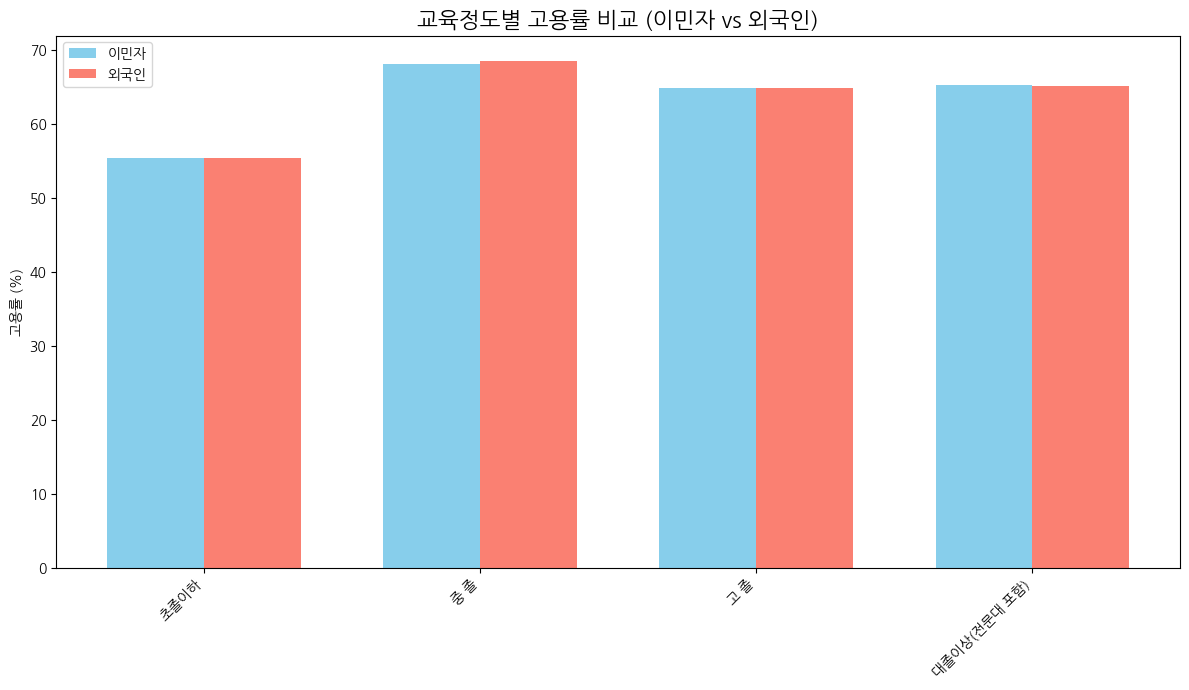

In [63]:
# 교육정도별 고용률 비교 (이민자 vs 외국인)

# 시각화할 데이터 준비
migrants_df = df[df['대상별'] == '이민자']
foreigners_df = df[df['대상별'] == '외국인']

# 그래프 그리기
fig, ax = plt.subplots(figsize=(12, 7))
width = 0.35  # 막대의 너비

x = np.arange(len(migrants_df['교육정도별']))
ax.bar(x - width/2, migrants_df['고용률 (%)'], width, label='이민자', color='skyblue')
ax.bar(x + width/2, foreigners_df['고용률 (%)'], width, label='외국인', color='salmon')

ax.set_ylabel('고용률 (%)')
ax.set_title('교육정도별 고용률 비교 (이민자 vs 외국인)', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(migrants_df['교육정도별'], rotation=45, ha='right')
ax.legend()
plt.tight_layout()
plt.show()

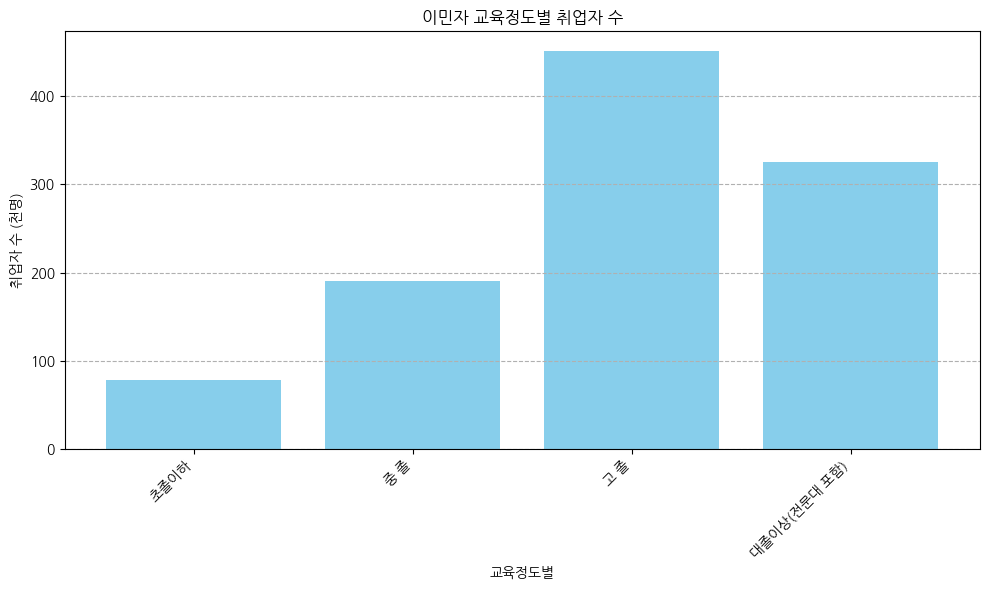

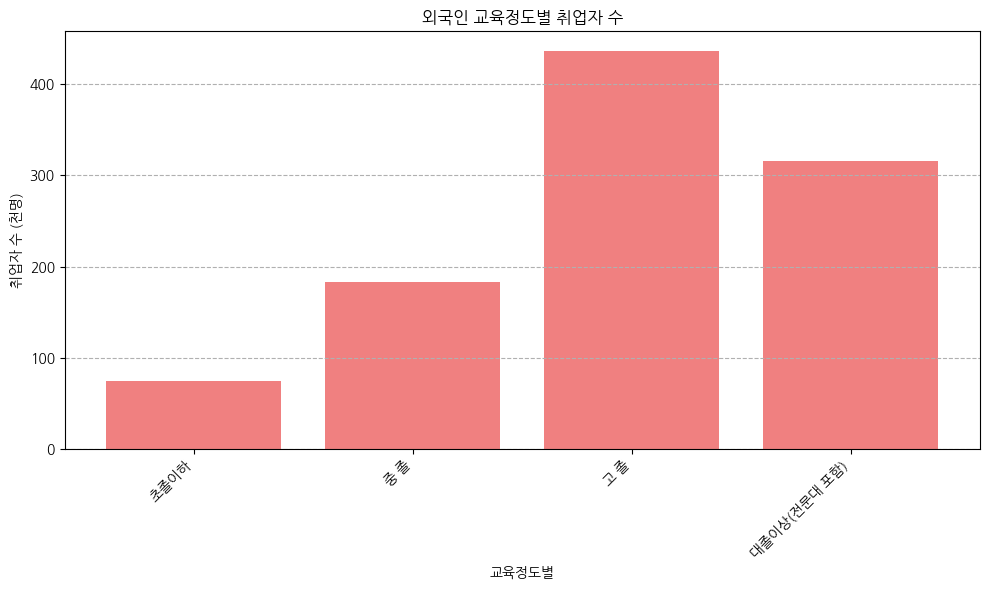

In [64]:
# 이민자와 외국인의 교육정도별 취업자 수 막대 그래프

# 이민자 데이터 시각화
plt.figure(figsize=(10, 6))
plt.bar(migrants_df['교육정도별'], migrants_df['· 취업자 (천명)'], color='skyblue')
plt.xlabel('교육정도별')
plt.ylabel('취업자 수 (천명)')
plt.title('이민자 교육정도별 취업자 수')
plt.grid(axis='y', linestyle='--')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 외국인 데이터 시각화
plt.figure(figsize=(10, 6))
plt.bar(foreigners_df['교육정도별'], foreigners_df['· 취업자 (천명)'], color='lightcoral')
plt.xlabel('교육정도별')
plt.ylabel('취업자 수 (천명)')
plt.title('외국인 교육정도별 취업자 수')
plt.grid(axis='y', linestyle='--')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

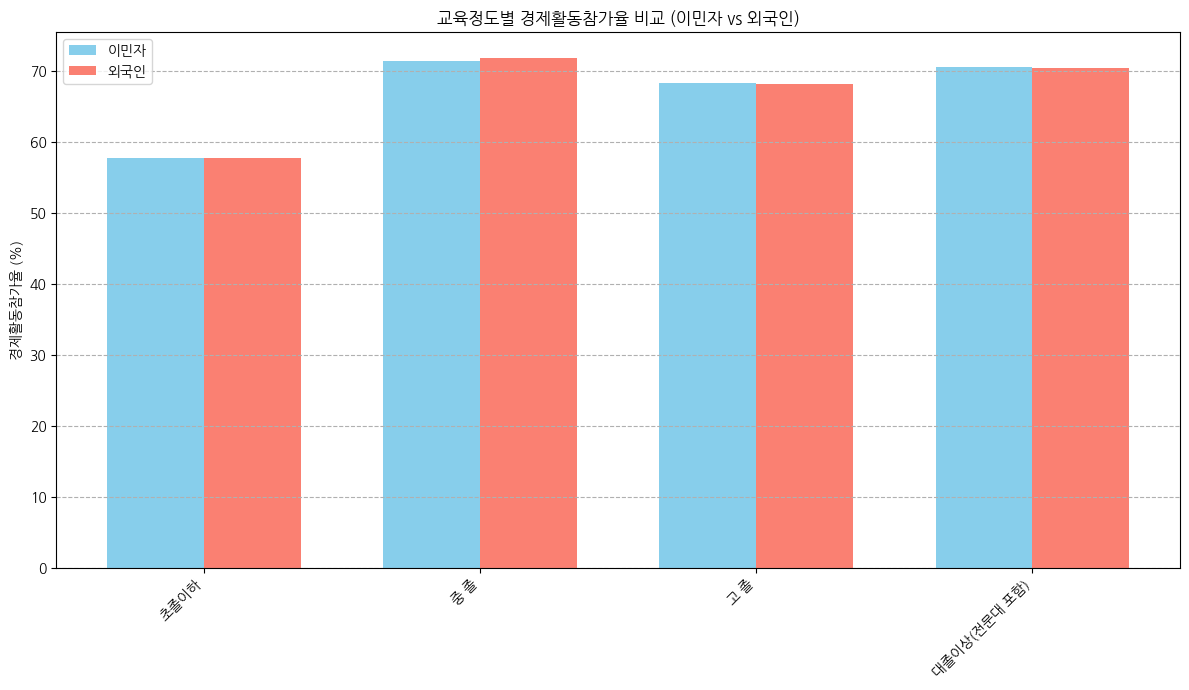

In [65]:
# 이민자 vs 외국인 경제활동참가율 비교
plt.figure(figsize=(12, 7))
width = 0.35
x = np.arange(len(migrants_df['교육정도별']))

plt.bar(x - width/2, migrants_df['경제활동참가율 (%)'], width, label='이민자', color='skyblue')
plt.bar(x + width/2, foreigners_df['경제활동참가율 (%)'], width, label='외국인', color='salmon')

plt.ylabel('경제활동참가율 (%)')
plt.title('교육정도별 경제활동참가율 비교 (이민자 vs 외국인)')
plt.xticks(x, migrants_df['교육정도별'], rotation=45, ha='right')
plt.legend()
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

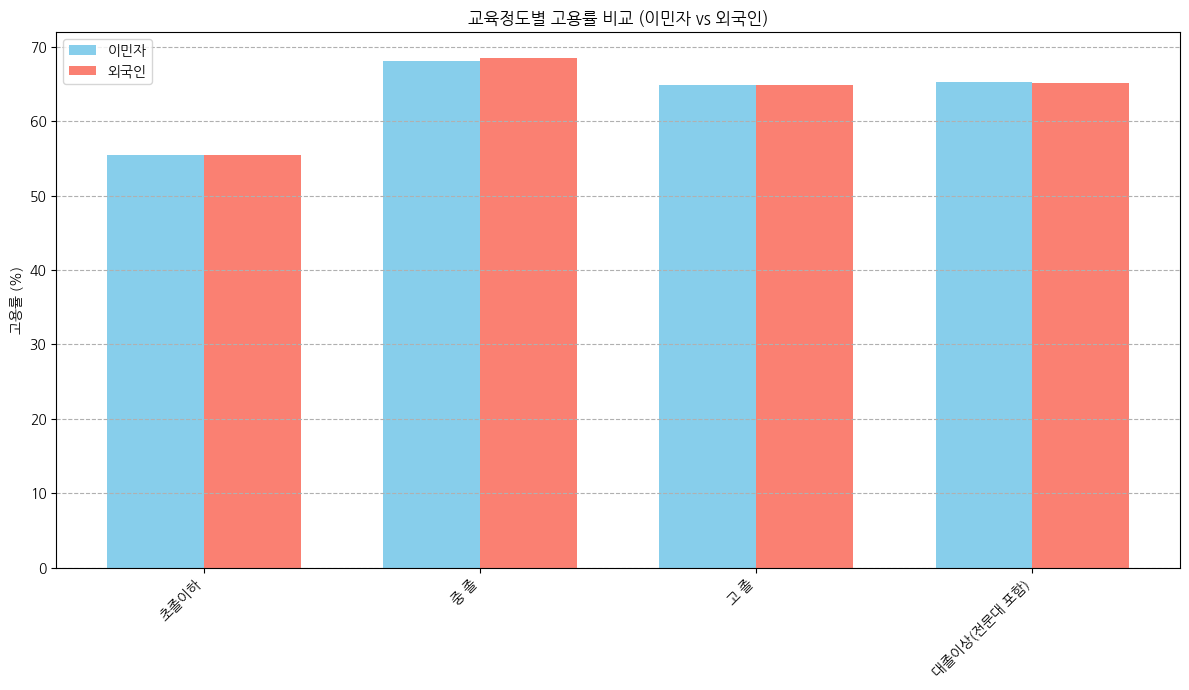

In [66]:
# 이민자 vs 외국인 고용률 비교
plt.figure(figsize=(12, 7))
width = 0.35
x = np.arange(len(migrants_df['교육정도별']))

plt.bar(x - width/2, migrants_df['고용률 (%)'], width, label='이민자', color='skyblue')
plt.bar(x + width/2, foreigners_df['고용률 (%)'], width, label='외국인', color='salmon')

plt.ylabel('고용률 (%)')
plt.title('교육정도별 고용률 비교 (이민자 vs 외국인)')
plt.xticks(x, migrants_df['교육정도별'], rotation=45, ha='right')
plt.legend()
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

### 시각화 인사이트

외국인과 이민자 경제활동지표가 상당히 비슷한 수준을 띈다.

### 피처 엔지니어링

* 실업률 (%): 경제활동인구 중 일자리를 구하지 못한 사람의 비율
* 실업자 수 (천명): 일자리가 없는 사람의 실제 수

실업률, 실업자 수는 정책적 개입의 직접적인 target 데이터를 제공한다.

In [67]:
# 실업률 (%): 경제활동인구 중 일자리를 구하지 못한 사람의 비율
# 실업률 (%) = 경제활동참가율 (%) - 고용률 (%)

df['실업률 (%)'] = df['경제활동참가율 (%)'] - df['고용률 (%)']
df

,대상별,교육정도별,15세 이상 인구 (천명),- 경제활동인구 (천명),· 취업자 (천명),- 비경제활동인구 (천명),경제활동참가율 (%),고용률 (%),실업률 (%)
0,이민자,초졸이하,140,81,78,59,57.8,55.4,2.4
1,이민자,중 졸,278,199,190,79,71.5,68.1,3.4
2,이민자,고 졸,695,475,451,220,68.3,64.9,3.4
3,이민자,대졸이상(전문대 포함),498,352,325,147,70.6,65.3,5.3
4,외국인,초졸이하,136,79,75,58,57.8,55.4,2.4
5,외국인,중 졸,268,192,183,75,71.9,68.5,3.4
6,외국인,고 졸,672,459,436,214,68.2,64.8,3.4
7,외국인,대졸이상(전문대 포함),485,341,316,143,70.4,65.1,5.3
8,귀화허가자,초졸이하,4,3,2,2,58.1,55.8,2.3
9,귀화허가자,중 졸,11,7,6,4,62.0,58.3,3.7


In [68]:
# 실업자 수 (천명): 일자리가 없는 사람의 실제 수
# 실업자 (천명) = 경제활동인구 (천명) - 취업자 (천명)

df['실업자 (천명)'] = df['- 경제활동인구 (천명)'] - df['· 취업자 (천명)']
df

,대상별,교육정도별,15세 이상 인구 (천명),- 경제활동인구 (천명),· 취업자 (천명),- 비경제활동인구 (천명),경제활동참가율 (%),고용률 (%),실업률 (%),실업자 (천명)
0,이민자,초졸이하,140,81,78,59,57.8,55.4,2.4,3
1,이민자,중 졸,278,199,190,79,71.5,68.1,3.4,9
2,이민자,고 졸,695,475,451,220,68.3,64.9,3.4,24
3,이민자,대졸이상(전문대 포함),498,352,325,147,70.6,65.3,5.3,27
4,외국인,초졸이하,136,79,75,58,57.8,55.4,2.4,4
5,외국인,중 졸,268,192,183,75,71.9,68.5,3.4,9
6,외국인,고 졸,672,459,436,214,68.2,64.8,3.4,23
7,외국인,대졸이상(전문대 포함),485,341,316,143,70.4,65.1,5.3,25
8,귀화허가자,초졸이하,4,3,2,2,58.1,55.8,2.3,1
9,귀화허가자,중 졸,11,7,6,4,62.0,58.3,3.7,1


      대상별         교육정도별  15세 이상 인구 (천명)  - 경제활동인구 (천명)  · 취업자 (천명)  \
0     이민자          초졸이하             140             81          78   
1     이민자           중 졸             278            199         190   
2     이민자           고 졸             695            475         451   
3     이민자  대졸이상(전문대 포함)             498            352         325   
4     외국인          초졸이하             136             79          75   
5     외국인           중 졸             268            192         183   
6     외국인           고 졸             672            459         436   
7     외국인  대졸이상(전문대 포함)             485            341         316   
8   귀화허가자          초졸이하               4              3           2   
9   귀화허가자           중 졸              11              7           6   
10  귀화허가자           고 졸              22             16          15   
11  귀화허가자  대졸이상(전문대 포함)              14             10          10   

    - 비경제활동인구 (천명)  경제활동참가율 (%)  고용률 (%)  실업률 (%)  실업자 (천명)  
0               59         

/tmp/ipython-input-2911688221.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  migrants_df['Education_Level_Encoded'] = migrants_df['교육정도별'].map(education_mapping)
/tmp/ipython-input-2911688221.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  migrants_df['고용률 (%)'] = pd.to_numeric(migrants_df['고용률 (%)'], errors='coerce')


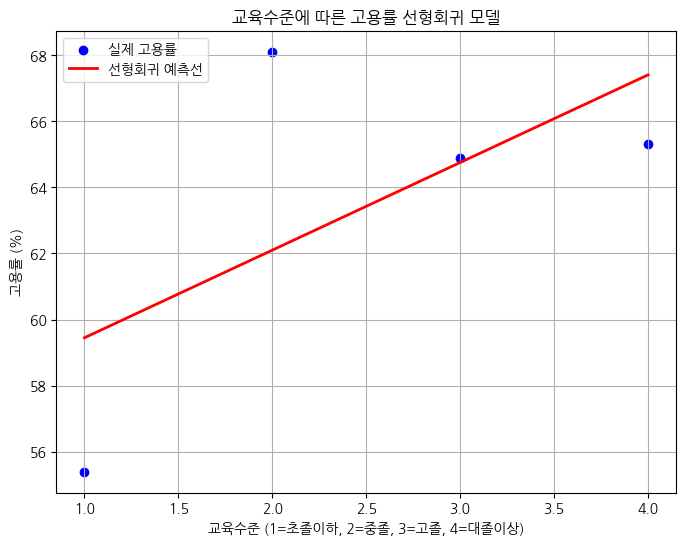


교육수준별 고용률 예측값:
초졸이하: 59.45%
중 졸: 62.10%
고 졸: 64.75%
대졸이상(전문대 포함): 67.40%


In [69]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# 모델 학습에 사용할 이민자 데이터만 필터링
migrants_df = df[df['대상별'] == '이민자']

print(df)
print(migrants_df)

# '교육정도별' 변수를 숫자형으로 인코딩
# 이 과정은 순서형 데이터의 의미를 부여하기 위함입니다.
education_mapping = {'초졸이하': 1, '중 졸': 2, '고 졸': 3, '대졸이상(전문대 포함)': 4}
migrants_df['Education_Level_Encoded'] = migrants_df['교육정도별'].map(education_mapping)

# '고용률 (%)' 컬럼을 숫자형으로 변환
migrants_df['고용률 (%)'] = pd.to_numeric(migrants_df['고용률 (%)'], errors='coerce')

# 예측 모델을 위한 데이터 준비
# X (독립 변수): 교육수준 (Education_Level_Encoded)
# y (종속 변수): 고용률 (%)
X = migrants_df[['Education_Level_Encoded']]
y = migrants_df['고용률 (%)']

# 모델 학습 (데이터가 적어 train/test 분리 없이 전체 데이터를 사용)
model = LinearRegression()
model.fit(X, y)

# 예측 및 결과 시각화
y_pred = model.predict(X)

print("모델의 계수(coefficient):", model.coef_[0])
print("모델의 절편(intercept):", model.intercept_)

plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='실제 고용률')
plt.plot(X, y_pred, color='red', linewidth=2, label='선형회귀 예측선')
plt.title('교육수준에 따른 고용률 선형회귀 모델')
plt.xlabel('교육수준 (1=초졸이하, 2=중졸, 3=고졸, 4=대졸이상)')
plt.ylabel('고용률 (%)')
plt.legend()
plt.grid(True)
plt.show()

# 예측값 출력
print("\n교육수준별 고용률 예측값:")
for edu_level, pred_rate in zip(migrants_df['교육정도별'], y_pred):
    print(f"{edu_level}: {pred_rate:.2f}%")

데이터: KOSIS(국가통계포털)_이민자체류실태및고용조사
교육정도별 경제활동인구(이민자)

이 데이터셋은 예측 모델을 만들기에는 적합하지 않음. 데이터의 양이 매우 적고 이미 요약된 통계 자료임.

하지만 학습 목적으로 "교육정도"가 "고용률"에 어떤 영향을 미치는지를 파악하는 간단한 선형 회귀 모델. 이는 실제 예측보다는 데이터의 경향성을 이해하기 위한 용도.

In [71]:
from sklearn.metrics import r2_score, mean_squared_error

r_squared = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)

print("\n--- 모델 성능 평가 ---")
print(f"결정 계수 (R-제곱): {r_squared:.2f}")
print(f"평균 제곱근 오차 (RMSE): {rmse:.2f} %")


--- 모델 성능 평가 ---
결정 계수 (R-제곱): 0.38
평균 제곱근 오차 (RMSE): 3.77 %


평가지표 해석

1. 결정 계수 (R
2
 ) 0.38

* R
2
 =0.38이라는 값은 이 모델이 고용률 변동의 약 38%만 설명한다는 뜻입니다. 나머지 62%는 교육 수준 외의 다른 변수들(나이, 경력, 산업, 거주 지역 등)에 의해 설명된다고 볼 수 있습니다. 일반적으로 0.7 이상이면 모델의 설명력이 높은 편이라고 평가합니다.

2. RMSE 3.77%
RMSE는 모델의 예측값과 실제값 사이의 평균 오차를 나타냅니다.

* 3.77%라는 오차는 모델이 예측한 고용률이 실제 고용률과 평균적으로 약 3.77%p 차이가 난다는 뜻입니다.

* 데이터셋의 고용률이 55.4%에서 68.1% 사이에 분포하는 것을 고려하면, 3.77%p의 오차는 결코 작지 않은 값입니다. 이는 모델의 예측 정확도가 낮다는 것을 의미합니다.

결론

* 한계: 내가 갖고 있는 데이터는 이미 요약된 통계 데이터이다. 데이터를 갖고 예측/분류 모델을 개발하기에 데이터량이 매우 적음. 이미 피처 자체가 계산된 통계 데이터.

* 구현한 선형 회귀 모델이 단순하고 집계된 데이터에 복잡한 현실을 제대로 반영하지 못하고 있음.

* 이 모델은 단지 "교육수준이 높아질수록 고용률이 증가하는 경향이 있다"는 추세를 보여주는 용도로는 의미가 있지만, 실제 고용률을 정확하게 예측하는 데는 한계가 있음.

=> 추가 데이터 수집 계획